🧠 PERCEPTRÓN SIMPLE - DEMOSTRACIÓN
Elige qué problema quieres resolver:
1. Compuerta lógica AND
2. Compuerta lógica OR
3. Datos linealmente separables
📊 Generando datos para compuerta AND...
   Tabla de verdad AND:
   x1 | x2 | salida
   ---|----|---------
   0  | 0  |   0
   0  | 1  |   0
   1  | 0  |   0
   1  | 1  |   1

🚀 Iniciando entrenamiento del Perceptrón...
   - Características: 2
   - Muestras de entrenamiento: 4
   - Pesos iniciales: [-0.01016886  0.00019527]
   - Bias inicial: 0
   Época   1: 2 errores
   ✅ ¡Convergencia alcanzada en época 7!
   - Pesos finales: [0.28983114 0.10019527]
   - Bias final: -0.30000000000000004
   🎉 Entrenamiento completado

📐 ECUACIÓN DEL PERCEPTRÓN:
   y = step(0.290*x1 + 0.100*x2 - 0.300)
   donde step(z) = 1 si z >= 0, sino 0

🔍 PROBANDO PREDICCIONES - Compuerta AND
   Entrada  | Real | Predicción | ¿Correcto?
   ---------|------|------------|------------
   [0.0, 0.0] |  0   |     0      |     ✅
   [0.0, 1.0] |  0   |     0      |     ✅
  

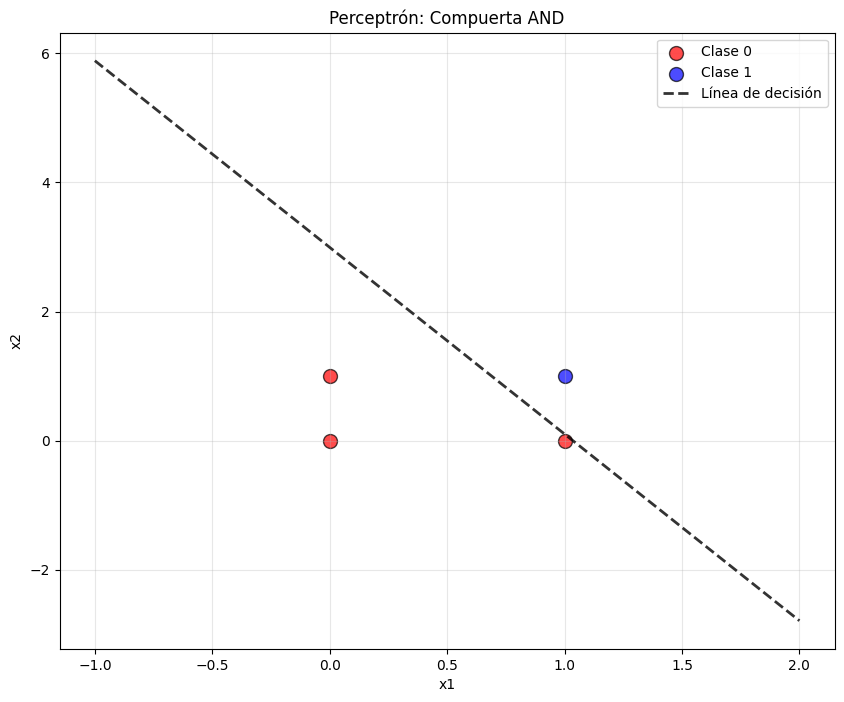

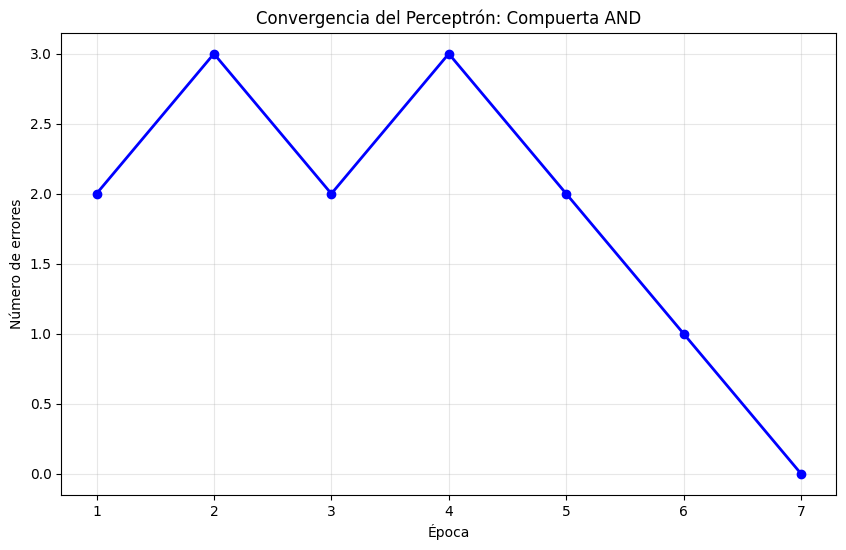

🎉 ¡Demostración del Perceptrón completada!

💡 Recuerda: El Perceptrón solo puede resolver problemas linealmente separables


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PerceptronSimple:
    def __init__(self, tasa_aprendizaje=0.1, max_iteraciones=100):
        """
        Inicializa el Perceptrón
        tasa_aprendizaje: qué tan rápido aprende (0.1 es bueno)
        max_iteraciones: máximo número de épocas para entrenar
        """
        self.tasa_aprendizaje = tasa_aprendizaje
        self.max_iteraciones = max_iteraciones
        self.pesos = None
        self.bias = None
        self.errores_por_epoca = []
    
    def funcion_activacion(self, z):
        """
        Función de activación escalón
        Retorna 1 si z >= 0, sino retorna 0
        """
        return np.where(z >= 0, 1, 0)
    
    def entrenar(self, X, y):
        """
        Entrena el perceptrón con los datos de entrada
        X: características de entrada (matriz)
        y: etiquetas verdaderas (vector)
        """
        print("🚀 Iniciando entrenamiento del Perceptrón...")
        
        # Inicializar pesos aleatoriamente
        n_caracteristicas = X.shape[1]
        self.pesos = np.random.normal(0, 0.01, n_caracteristicas)
        self.bias = 0
        
        print(f"   - Características: {n_caracteristicas}")
        print(f"   - Muestras de entrenamiento: {len(X)}")
        print(f"   - Pesos iniciales: {self.pesos}")
        print(f"   - Bias inicial: {self.bias}")
        
        # Entrenar por épocas
        for epoca in range(self.max_iteraciones):
            errores = 0
            
            # Procesar cada muestra
            for i in range(len(X)):
                # Calcular la salida
                z = np.dot(X[i], self.pesos) + self.bias
                prediccion = self.funcion_activacion(z)
                
                # Calcular el error
                error = y[i] - prediccion
                
                # Actualizar pesos y bias si hay error
                if error != 0:
                    self.pesos += self.tasa_aprendizaje * error * X[i]
                    self.bias += self.tasa_aprendizaje * error
                    errores += 1
            
            # Guardar errores de esta época
            self.errores_por_epoca.append(errores)
            
            # Mostrar progreso cada 10 épocas
            if (epoca + 1) % 10 == 0 or epoca == 0:
                print(f"   Época {epoca + 1:3d}: {errores} errores")
            
            # Si no hay errores, el modelo ha convergido
            if errores == 0:
                print(f"   ✅ ¡Convergencia alcanzada en época {epoca + 1}!")
                break
        
        print(f"   - Pesos finales: {self.pesos}")
        print(f"   - Bias final: {self.bias}")
        print("   🎉 Entrenamiento completado\n")
    
    def predecir(self, X):
        """
        Hace predicciones con el modelo entrenado
        """
        z = np.dot(X, self.pesos) + self.bias
        return self.funcion_activacion(z)
    
    def calcular_precision(self, X, y):
        """
        Calcula la precisión del modelo
        """
        predicciones = self.predecir(X)
        precision = np.mean(predicciones == y)
        return precision
    
    def mostrar_ecuacion(self):
        """
        Muestra la ecuación aprendida por el perceptrón
        """
        print("📐 ECUACIÓN DEL PERCEPTRÓN:")
        ecuacion = f"   y = step("
        for i, peso in enumerate(self.pesos):
            if i > 0:
                ecuacion += " + " if peso >= 0 else " - "
                ecuacion += f"{abs(peso):.3f}*x{i+1}"
            else:
                ecuacion += f"{peso:.3f}*x{i+1}"
        
        if self.bias >= 0:
            ecuacion += f" + {self.bias:.3f})"
        else:
            ecuacion += f" - {abs(self.bias):.3f})"
        
        print(ecuacion)
        print("   donde step(z) = 1 si z >= 0, sino 0\n")

def generar_datos_and():
    """
    Genera datos para la compuerta lógica AND
    """
    print("📊 Generando datos para compuerta AND...")
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # Solo 1,1 -> 1
    
    print("   Tabla de verdad AND:")
    print("   x1 | x2 | salida")
    print("   ---|----|---------")
    for i in range(len(X)):
        print(f"   {X[i][0]}  | {X[i][1]}  |   {y[i]}")
    print()
    
    return X, y

def generar_datos_or():
    """
    Genera datos para la compuerta lógica OR
    """
    print("📊 Generando datos para compuerta OR...")
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 1])  # Solo 0,0 -> 0
    
    print("   Tabla de verdad OR:")
    print("   x1 | x2 | salida")
    print("   ---|----|---------")
    for i in range(len(X)):
        print(f"   {X[i][0]}  | {X[i][1]}  |   {y[i]}")
    print()
    
    return X, y

def generar_datos_lineales():
    """
    Genera datos linealmente separables
    """
    print("📊 Generando datos linealmente separables...")
    np.random.seed(42)
    
    # Clase 0: puntos en la esquina inferior izquierda
    clase_0 = np.random.randn(20, 2) * 0.5 + np.array([1, 1])
    
    # Clase 1: puntos en la esquina superior derecha  
    clase_1 = np.random.randn(20, 2) * 0.5 + np.array([3, 3])
    
    X = np.vstack([clase_0, clase_1])
    y = np.hstack([np.zeros(20), np.ones(20)])
    
    print(f"   - {len(clase_0)} puntos de clase 0")
    print(f"   - {len(clase_1)} puntos de clase 1")
    print()
    
    return X, y

def visualizar_resultados(X, y, perceptron, titulo):
    """
    Visualiza los datos y la línea de decisión del perceptrón
    """
    plt.figure(figsize=(10, 8))
    
    # Colores para las clases
    colores = ['red', 'blue']
    etiquetas = ['Clase 0', 'Clase 1']
    
    # Graficar puntos de datos
    for clase in [0, 1]:
        mask = y == clase
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colores[clase], label=etiquetas[clase], 
                   s=100, alpha=0.7, edgecolors='black')
    
    # Dibujar línea de decisión
    if len(X[0]) == 2:  # Solo para datos 2D
        # Calcular puntos de la línea de decisión
        # w1*x1 + w2*x2 + bias = 0  ->  x2 = -(w1*x1 + bias)/w2
        w1, w2 = perceptron.pesos
        bias = perceptron.bias
        
        if w2 != 0:  # Evitar división por cero
            x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            x1_linea = np.array([x1_min, x1_max])
            x2_linea = -(w1 * x1_linea + bias) / w2
            
            plt.plot(x1_linea, x2_linea, 'k--', linewidth=2, 
                    label='Línea de decisión', alpha=0.8)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptrón: {titulo}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualizar_convergencia(perceptron, titulo):
    """
    Visualiza la convergencia del entrenamiento
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(perceptron.errores_por_epoca) + 1), 
             perceptron.errores_por_epoca, 'b-o', linewidth=2, markersize=6)
    plt.xlabel('Época')
    plt.ylabel('Número de errores')
    plt.title(f'Convergencia del Perceptrón: {titulo}')
    plt.grid(True, alpha=0.3)
    plt.show()

def probar_predicciones(perceptron, X, y, nombre_problema):
    """
    Prueba las predicciones del perceptrón entrenado
    """
    print(f"🔍 PROBANDO PREDICCIONES - {nombre_problema}")
    print("=" * 50)
    
    predicciones = perceptron.predecir(X)
    precision = perceptron.calcular_precision(X, y)
    
    print("   Entrada  | Real | Predicción | ¿Correcto?")
    print("   ---------|------|------------|------------")
    
    for i in range(len(X)):
        entrada = X[i]
        real = y[i]
        pred = predicciones[i]
        correcto = "✅" if real == pred else "❌"
        
        if len(entrada) == 2:
            print(f"   [{entrada[0]:.1f}, {entrada[1]:.1f}] |  {real}   |     {pred}      |     {correcto}")
        else:
            entrada_str = str(entrada).replace('\n', '')
            print(f"   {entrada_str} |  {real}   |     {pred}      |     {correcto}")
    
    print(f"\n   📊 Precisión: {precision:.3f} ({precision*100:.1f}%)")
    print()

def menu_principal():
    """
    Menú principal para elegir qué problema resolver
    """
    print("🧠 PERCEPTRÓN SIMPLE - DEMOSTRACIÓN")
    print("=" * 40)
    print("Elige qué problema quieres resolver:")
    print("1. Compuerta lógica AND")
    print("2. Compuerta lógica OR") 
    print("3. Datos linealmente separables")
    
    while True:
        try:
            opcion = int(input("\nIngresa tu opción (1, 2 o 3): "))
            if opcion in [1, 2, 3]:
                return opcion
            else:
                print("Por favor ingresa 1, 2 o 3")
        except ValueError:
            print("Por favor ingresa un número válido")

def main():
    """
    Función principal del programa
    """
    opcion = menu_principal()
    
    # Generar datos según la opción elegida
    if opcion == 1:
        X, y = generar_datos_and()
        titulo = "Compuerta AND"
    elif opcion == 2:
        X, y = generar_datos_or()
        titulo = "Compuerta OR"
    else:
        X, y = generar_datos_lineales()
        titulo = "Clasificación Lineal"
    
    # Crear y entrenar el perceptrón
    perceptron = PerceptronSimple(tasa_aprendizaje=0.1, max_iteraciones=100)
    perceptron.entrenar(X, y)
    
    # Mostrar ecuación aprendida
    perceptron.mostrar_ecuacion()
    
    # Probar predicciones
    probar_predicciones(perceptron, X, y, titulo)
    
    # Visualizar resultados
    if len(X[0]) == 2:  # Solo para datos 2D
        visualizar_resultados(X, y, perceptron, titulo)
    
    # Visualizar convergencia
    visualizar_convergencia(perceptron, titulo)
    
    print("🎉 ¡Demostración del Perceptrón completada!")
    print("\n💡 Recuerda: El Perceptrón solo puede resolver problemas linealmente separables")

# Ejecutar el programa
if __name__ == "__main__":
    main()